In [1]:
import pprint

from pydantic import BaseModel, Field

import make_agents as ma

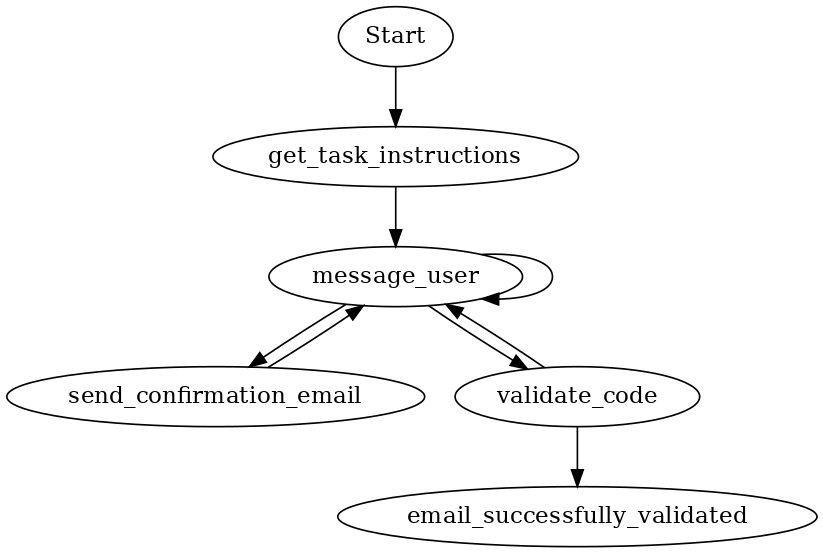

In [4]:
# Define action functions


@ma.action
def get_task_instructions():
    return "Get the user's email address and validate it"


class MessageUserArg(BaseModel):
    message: str = Field(description="Message to send user")


@ma.action
def message_user(arg: MessageUserArg):
    """Send the user a message, and get their response."""
    response = ""
    while response == "":
        response = input(arg.message).strip()
    return response


class SendConfirmationArg(BaseModel):
    email: str = Field(description="The user's email address")


@ma.action
def send_confirmation_email(arg: SendConfirmationArg):
    """Send them a confirmation email, with a code."""
    # Example of what this might look like
    if arg.email.endswith(".com"):
        return {"sent_email": True}
    else:
        return {"sent_email": False}


class ValidateCodeArg(BaseModel):
    code: str = Field(description="The code the user was sent")


@ma.action
def validate_code(arg: ValidateCodeArg):
    """Validate the code the user was sent."""
    # Example of what this might look like
    if arg.code == "1234":
        return {"code_is_valid": True}
    else:
        return {"code_is_valid": False}


@ma.action
def email_successfully_validated():
    pass


# Define action graph
action_graph = {
    ma.Start: [get_task_instructions],
    get_task_instructions: [message_user],
    message_user: [message_user, send_confirmation_email, validate_code],
    send_confirmation_email: [message_user],
    validate_code: [message_user, email_successfully_validated],
}
display(ma.bonus.draw_graph(action_graph))

In [5]:
for messages in ma.run_agent(action_graph):
    pprint.pprint(messages[-1])

{'content': '"Get the user\'s email address and validate it"',
 'name': 'get_task_instructions',
 'role': 'function'}
{'content': None,
 'function_call': {'arguments': '{\n'
                                '"message": "Could you please provide me with '
                                'your email address?"\n'
                                '}',
                   'name': 'message_user'},
 'role': 'assistant'}
{'content': '"it\'s a@foo.co.uk"', 'name': 'message_user', 'role': 'function'}
{'content': None,
 'function_call': {'arguments': '{\n'
                                '"next_function": "send_confirmation_email"\n'
                                '}',
                   'name': 'select_next_func'},
 'role': 'assistant'}
{'content': '{"next_function": "send_confirmation_email"}',
 'name': 'select_next_func',
 'role': 'function'}
{'content': None,
 'function_call': {'arguments': '{\n"email": "a@foo.co.uk"\n}',
                   'name': 'send_confirmation_email'},
 'role': 'assistan